# Where to Find Meteorites in the USA (Python Training)

## Python DATA SCIENCE TRAINING

So you have some fresh data, which you are sure contains useful insights. But now what?

While every dataset, and every specific end analysis, will have its own peculiarities, you should always follow a general procedure to come to findings. This will make sure your findings are efficiently found and consistent.

In this blog post, I will walk through the general 10-step approach we use, and apply it to answer the question, **“what state should I go where Ican most readily find meteorites in the continental USA?”** I will do this by finding out which states have the **highest number of meteorite strikes per 1,000 square miles.** 

I’ll give you the answer first - then we will walk through an example of how I got to this answer, using data from the Meteorite Landings dataset provided by the Meteorical Society, accessible at the NASA Open Data Portal.

*My analysis uses Python 3.9 in Visual Studio Code. I will assume that you have Python 3.9 installed and that you know how to install Python libraries. We will be using the libraries pandas, geopandas, shapely, plotly, and folium.* 

## INSERT METEORITE STRIKES CHART

As you can see, New Mexico, Kansas, California, Texas, and Arizona, are the winners, in terms of meteorite falls per 1,000 square miles. 

Where are these meteorite strikes? This map shows them all. 

## INSERT MAP

There you have it. Now, let’s walk through how I did this analysis and prepared the visualizations (using two very handy visualization Python libraries, plotly and folium).

### Step 1: Define Your Initial Goal 

Your very first step in any data science project is to carefully define your initial goal. What are you trying to achieve? Are you answering a question? Are you testing a hypothesis? Are you trying to create specific metrics to support your business operations? Are you trying to build a data product? This initial goal should not be more than about one paragraph and should be as concise and explicit as possible. You should keep in mind that you may revise this goal as you get deeper into your data, and find its limitations, or find new possibilities for its application — but you should start with some kind of goal, to focus your efforts. 

Along with the goal, you should include any background information that is relevant, any datasets you have and plan to use, and any key assumptions you plan to make during your analysis (and their justification). It is also good to state which tools you will use in this analysis. 

Here is the initial goal for this specific project.

>I will find where in the continental USA (lower 48) has the highest density of meteorite strikes per square mile. These regions will be assumed to be those where I would most readily find meteorites. I will use the Meteorite Landings dataset provided by the Meteorical Society, accessible at [NASA Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/ak9y-cwf9). My analysis will be completed using Python 3.9 in Microsoft Visual Studio Code.


### Step 2: Retrieve and Summarize your Dataset

In this step, you will retrieve your dataset and summarize some of its key characteristics. Below there is a list of key characteristics and how they apply to the Meteorite Landings dataset:

| Characteristic | Example (Meteorite Landings dataset) |
| --- | --- | 
| How to access data | Accessible at [NASA Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/ak9y-cwf9) |
| Data type(s) | CSV file| 
| File(s) containing the data | One file called Meteorite_Landings.CSV |
| Size of data (bytes) | 4.2 MB | 
| Data structure  |  Tabular CSV data with 11 fields and 45,716 entries, including a mix of strings and numeric data (see below) |
| If data is static or is dynamically updated | Static |
| Vintage of the data (i.e. its last update) | Date updated July 20, 2015, Metadata updated June 27, 2018 |
| (If data is dynamically updated) Frequency of data updates | N/A |
| Files containing documentation | [This link](http://visualizing.org/datasets/meteorite-landings) is referred to as the background but it is broken. <br/> The only documentation available is at this [NASA metadata webpage](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh) |

Most of this is summarized based upon the metadata from the [NASA metadata webpage](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh), but I retrieved the size and data structure using pandas, our favorite Python library for answering these kinds of questions, because of its ease of use and many handy methods for data exploration. The pandas read_csv() method is brilliantly simple to use, and I used the info() method to review the data size and data types. 

>import pandas as pd
>meteorite_data = pd.read_csv('example-datasets/Meteorite_Landings.csv')
>meteorite_data.info()

 ## INSERT INFO() SNAPSHOT

In [16]:
import pandas as pd
meteorite_data = pd.read_csv('example-datasets/Meteorite_Landings.csv')
meteorite_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
 10  States       1659 non-null   float64
 11  Counties     1659 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 4.2+ MB


### Step 3: Data Dictionary Review and Key Variable identification
Now that you have your dataset and know its basic characteritics, it is time to review and understand every data field in your dataset. You must identify key variables that you will use in your analysis, and others which you *might* use in your analysis. You should also be observant for any data fields which might support your analysis, or be used in other analyses. 

To do this, you should review examples of your data fields -- pandas .head() and .tail() will show the first and last 5 rows, respectively, but we prefer to review a random sample, since the beginning and end of a dataset are not necessarily representative of the dataset as a whole. I will use the handy pandas function .sample(n=10) to select 10 random rows, and use the .style attribute to print the output in an easy to read format.

>meteorite_data.sample(10).style

In [18]:
meteorite_data.sample(10).style

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,States,Counties
21152,Lewis Cliff 88425,14170,Valid,L6,8.800000,Found,1988.000000,-84.237250,161.449130,"(-84.23725, 161.44913)",nan,nan
24648,Miller Range 07273,51295,Valid,H5-an,33.900000,Found,2007.000000,0.000000,0.000000,"(0.0, 0.0)",nan,nan
23268,Meteorite Hills 00572,15807,Valid,H4,95.800000,Found,2000.000000,-79.683330,155.750000,"(-79.68333, 155.75)",nan,nan
39401,Yamato 790002,25351,Valid,H4,0.480000,Found,1979.000000,-71.500000,35.666670,"(-71.5, 35.66667)",nan,nan
2966,Allan Hills A78226,1839,Valid,H6,6.260000,Found,1977.000000,-76.716670,159.666670,"(-76.71667, 159.66667)",nan,nan
25584,Miller Range 090505,55003,Valid,LL5,9.200000,Found,2009.000000,0.000000,0.000000,"(0.0, 0.0)",nan,nan
2941,Allan Hills A78201,1814,Valid,H5,9.800000,Found,1978.000000,-76.716670,159.666670,"(-76.71667, 159.66667)",nan,nan
26275,Muckera 009,16829,Valid,L5,8.000000,Found,1991.000000,-30.366670,130.083330,"(-30.36667, 130.08333)",nan,nan
34033,Queen Alexandra Range 97401,20858,Valid,LL5,42.300000,Found,1997.000000,-84.000000,168.000000,"(-84.0, 168.0)",nan,nan
22033,MacAlpine Hills 02713,15009,Valid,H6,1.740000,Found,2002.000000,nan,nan,nan,nan,nan


Here is a short summary of the fields, based on what we can observe, and from what the (very limited) documentation provides:

1) **name** is just a verbal description. This won't be much use in any analysis.
2) **id** appears to be a unique number for each field - pretty handy.
3) **nametype** it is not clear what this means, but if you look at the [webpage](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh) it says "Under NameType, 'valid' is for most meteorites and 'relict' are for objects that were once meteorites but are now highly altered by weathering on Earth." This field doesn't appear that useful to us.
4) **recclass** is ambiguous, and unfortunately the documentation doesn't describe what it means. (This is a problem data scientists have to live with - badly documented data.)
5) **mass** is the size of the meteorite.
6) **fall** is always either "Found" or "Fell" - telling us whether the meteorite was observed or actually found.
7) **year** is the year of being found.
8) **reclat**, **reclong**, and **GeoLocation** are all redundant fields expressing the location of the observation.
9) **States** and **Counties** are also ambiguous fields, composed of many numbers, and the documentation does not describe it any better.

Since we are interested simply in the spatial density of meteorite landings, our key variables are **reclat**, **reclong**, and **GeoLocation**. We also might use **year**, **id**, and **mass**, since these are interesting variables which could affect our analysis in ways we cannot yet anticipate. The variable **name** will also be useful as an identifier while we review the data.

Since we don't even understand what **nametype**, **reclass**, **States**, or **Counties** mean, we can't use them. 

It is also very hard to see how we will use **fall**. 


### Step 4: Explore your Data, Clean your Data, Explore your Data
Now begins a step with an end goal of preparing your data for the final analysis you wish to do. This is generally an iterative process, where you first explore the data, first to find obvious issues needing correction, like:

* Formatting problems in your data needing correction.
* Standardization of fields to single, comparable units of a single comparable data type. 
* Replacing Blank or Null values, especially in your key variables.

You should also apply any filters to focus on the data points you are interested in.

You can then do some more advanced exploration and cleaning. You should review the characteristics of your key variables, including statistics like median, maximum, minimum, but also other characteristics like clusters and intervariable correlations. This will help you identify outliers in your dataset which might need correction. This will help you to find other problems in your data whcih require cleaning, and will support your analysis by helping you understand the nature of your data.

I will do this step by step for the example applied to the Meteorite Landings dataset.

#### Reviewing reclat, reclon, Geolocation rows with NaN
From visual inspection of a random sample of data from earlier, it is clear that many meteorites do not have location data (**reclat**, **reclon**, or **GeoLocation** are **nan**). Since we need this information to evaluate our key metric (meteorite strikes per 1,000 sq miles, per US state), these rows useless, and should be dropped. 

I won't drop the rows immediately, however, because I don't know if **reclat**, **reclon**, and **GeoLocation**, are redundant. Are there **nan** rows in **reclat**, **reclon**, where data is available in **Geolocation**? If that is the case, then we would fill in the blanks from one field with the other. So let's double check this before making any removals. I will do this using the handy python methods isna() and notna() (the names are self-descriptive), finding the overlap between rows where **reclat** is **nan** and **GeoLocation** is *not* **nan**, and vice versa. I will also print out results with print() and f strings.

In [20]:
# Check and compare the number of NaN rows in each field. 
nan_rec_data=meteorite_data[meteorite_data['reclat'].isna()]
nan_geo_data=meteorite_data[meteorite_data['GeoLocation'].isna()]

print(f"The number of rows where reclat is NaN is {len(nan_rec_data)}, and where GeoLocation is NaN is {len(nan_geo_data)}.")

# Now create a dataframe whichi includes any instances where one value is NaN, but the other is not.
non_overlap_nan = meteorite_data[(meteorite_data['reclat'].isna()) & (meteorite_data['GeoLocation'].notna())]

non_overlap_nan = non_overlap_nan.append(meteorite_data[(meteorite_data['reclat'].notna()) & (meteorite_data['GeoLocation'].isna())])
print(f"The number of rows where only one location value is NaN is {len(non_overlap_nan)}")


The number of rows where reclat is NaN is 7315, and where GeoLocation is NaN is 7315.
The number of rows where only one location value is NaN is 0


The location values of **reclat**, **reclon**, and **GeoLocation** are redundant - so we can drop all NaN values as useless. Of course pandas has a function to do this - dropna(subset=[columns]).

In [21]:
print(f"Total number of meteorite strikes in the dataset: {len(meteorite_data)}.")
meteorite_data_c = meteorite_data.dropna(subset=['reclat'])
print(f"Total number of meteorite strikes containing location information: {len(meteorite_data_c)}.")

Total number of meteorite strikes in the dataset: 45716.
Total number of meteorite strikes containing location information: 38401.


##### Filter Meteorite Strikes in the Lower 48 States
Now, filter the strikes to only those in the contiguous USA. To do so, let's use the geopandas and shapely libraries, which provide very easy to use tools for geospatial data manipulation and analysis. I then downloaded a Cartographic Boundary Shapefile from the [US Census Bureau](https://www.census.gov/geographies/mapping-files/2018/geo/carto-boundary-file.html) which contains a map of the USA and all of its states. I limit this to the lower 48 states, and then only include meteorite strikes within them.

In [22]:
import geopandas as gpd

# Load shapefile with USA data. This shapefile is included in the Github repository.
states = gpd.read_file('shapefiles\\cb_2018_us_state_20m.shp')

# Remove the states and territories which are not in the lower 48.
states = states[states['NAME']!="Hawaii"]
states = states[states['NAME']!="Puerto Rico"]
states = states[states['NAME']!="Alaska"]

In [23]:
# Import this method from shapely.
from shapely.geometry import Point  #Polygon

# First, create a version where all features are merged. 
merged = states['geometry'].unary_union

# Then, check if each point is located within the merged dataset of USA states.
withinUSAlist = []
for lon,lat in zip(meteorite_data_c.reclong, meteorite_data_c.reclat):
    pt = Point(lon, lat)
    withinUSA = pt.within(merged)
    withinUSAlist.append(withinUSA)

# Finally, filter it to only those located within the contiguous boundaries of the USA. 
meteorite_data_c = meteorite_data_c[withinUSAlist]
print(f"I found {len(meteorite_data_c)} meteorites within the USA boundaries!")

I found 1653 meteorites within the USA boundaries!


You have filtered this down to the 1,653 meteorite strikes which are recorded to have landed in the lower 48 states of the United States of America. 

##### Review Statistics and Data Regarding Meteorite Masses and Years
I will take a look at these statistics, which might tell us about any limitations in the data that could be relevant in our analysis. I will look at the summary statistics with describe.

In [25]:
meteorite_data_c[['mass (g)','year']].describe()

,mass (g),year
count,1.646000e+03,1647.000000
mean,5.510811e+04,1956.869460
std,8.475278e+05,43.219487
min,5.000000e-01,1807.000000
25%,8.947500e+01,1935.000000
50%,1.705000e+03,1967.000000
75%,1.055000e+04,1998.000000
max,3.000000e+07,2012.000000


Now I will plot a histogram of the mass in grams, on a logarithmic scale. 

array([[<AxesSubplot:title={'center':'mass (g)'}>]], dtype=object)

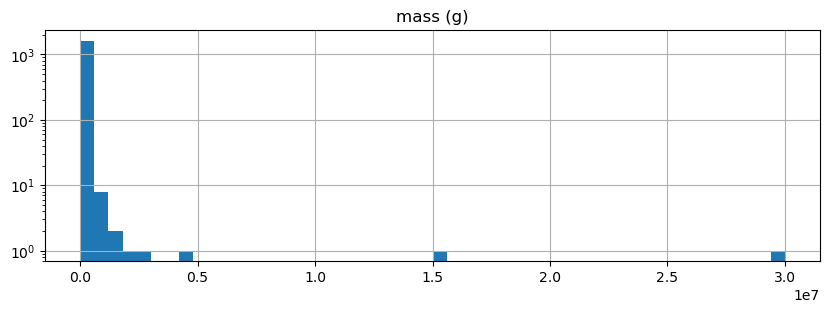

In [52]:
meteorite_data_c[['mass (g)']].hist(label='mass (g) histogram (log scale)',bins=50,figsize=(10,3),log=True)

The median mass of the meteors found is 1.7 kg - that's big! But unsurprising, since it's more likely to find big ones. 

What is more remarkable is that the largest meteorite is 3 x 10<sup>7</sup> grams -- that is 30 tons! And there are many others that weigh more than 1 ton (0.1 x 10<sup>7</sup> grams). What are these monsters? Let's take a look by extracting data on meteorites over 1 ton. 

In [53]:
meteorite_data_c[meteorite_data_c['mass (g)']>1000000].style

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,States,Counties
707,Norton County,17922,Valid,Aubrite,1100000.000000,Fell,1948.000000,39.683330,-99.866670,"(39.68333, -99.86667)",17.000000,1252.000000
5201,Brenham,5136,Valid,"Pallasite, PMG-an",4300000.000000,Found,1882.000000,37.582500,-99.163610,"(37.5825, -99.16361)",17.000000,1238.000000
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.000000,Found,1891.000000,35.050000,-111.033330,"(35.05, -111.03333)",7.000000,986.000000
12637,Goose Lake,10947,Valid,"Iron, IAB-sLL",1169500.000000,Found,1938.000000,41.980000,-120.541670,"(41.98, -120.54167)",8.000000,76.000000
26349,Navajo,16926,Valid,"Iron, IIAB",2184000.000000,Found,1921.000000,35.333330,-109.500000,"(35.33333, -109.5)",7.000000,985.000000
30966,Odessa (iron),17985,Valid,"Iron, IAB-MG",1600000.000000,Found,1922.000000,31.716670,-102.400000,"(31.71667, -102.4)",23.000000,3169.000000
30977,Old Woman,18007,Valid,"Iron, IIAB",2753000.000000,Found,1976.000000,34.466670,-115.233330,"(34.46667, -115.23333)",8.000000,78.000000
35542,Quinn Canyon,22364,Valid,"Iron, IIIAB",1450000.000000,Found,1908.000000,38.083330,-115.533330,"(38.08333, -115.53333)",10.000000,2401.000000
38317,Willamette,24269,Valid,"Iron, IIIAB",15500000.000000,Found,1902.000000,45.366670,-122.583330,"(45.36667, -122.58333)",12.000000,2317.000000


There are 9 such meteorites, which are famous (or infamous?). The largest one in the dataset (weighing 30 tons) is the ["Canyon Diablo"](https://en.wikipedia.org/wiki/Canyon_Diablo_(meteorite)) meteorite, which fell in Arizona 50,000 years ago a created Meteor Crater (or [Barringer Crater](https://www.oxfordreference.com/view/10.1093/oi/authority.20110803095448625)), which is almost 3/4 of a mile wide and over 600 feet deep.

The only meteorite of this size marked as "fell" is the [Norton County](https://en.wikipedia.org/wiki/Norton_County_(meteorite)) meteorite - the rest were "found". This means the Norton County meteorite is the only one observed to fall, rather than having been found after impacting the earth already. 

>After a brilliant fireball and a loud noise, a very large shower of meteorites fell over a large area of Norton County (Kansas) and Furnas County (Nebraska) on February 18, 1948. 
>The main mass (about 1,070 kilograms (2,360 lb)) is the center piece of the meteorite display at the University of New Mexico in Albuquerque. [Wikipedia](https://en.wikipedia.org/wiki/Norton_County_(meteorite))


I will also look at a histogram of the years, which will help understand trends in observations over time. 

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

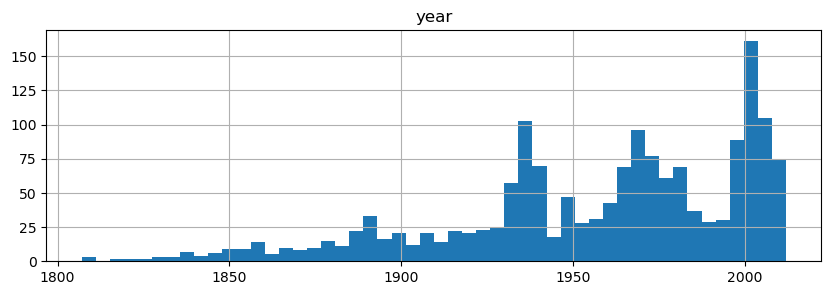

In [54]:
meteorite_data_c[['year']].hist(bins=50,figsize=(10,3))


The pattern of "years" shows clear maximums around 1940, 1960, and 2000 -- either meteorite hunters got very interested in these years, or perhaps the data was aggregated then. Still, it does not affect our analysis at this stage.

This is all very interesting, but it does not in the end affect our analysis that much -- except perhaps to tell us that we are most likely to find larger meteorites. 


##### Label the Meteorite Strikes by State
Now, we have to label each meteorite strike by the state it appears in. This way, we will be able to analyze the spatial density, by state. I wil use a nested loop and the method .within() to do this. Then I will display a rnadom sample of 5 meteorites, to make sure the labeling was completed correctly.

In [56]:
# This is the output, describing which are in which state.
statelist = []

# Loop over strikes.
for lon,lat in zip(meteorite_data_c.reclong, meteorite_data_c.reclat):
    pt = Point(lon, lat)
    
    # Loop over states.
    for number in range(len(states)):
        withinstate = pt.within(states['geometry'].iloc[number])
        if withinstate:
        
            statelist = statelist+ [states.iloc[number]['NAME']]
            
meteorite_data_c['State']  =statelist    

meteorite_data_c.sample(5).style

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,States,Counties,State
17340,Kendall County,12274,Valid,"Iron, IAB-ung",21000.000000,Found,1887.000000,29.400000,-98.500000,"(29.4, -98.5)",23.000000,3027.000000,Texas
12554,Gahanna,10842,Valid,"Iron, IAB-MG",1201.000000,Found,1950.000000,40.016670,-82.866670,"(40.01667, -82.86667)",38.000000,2520.000000,Ohio
21785,Lucerne Valley 100,52532,Valid,CK5,0.800000,Found,2008.000000,34.487380,-116.960650,"(34.48738, -116.96065)",8.000000,78.000000,California
8315,Dix,7651,Valid,L6,44000.000000,Found,1927.000000,41.233330,-103.483330,"(41.23333, -103.48333)",19.000000,2301.000000,Nebraska
16344,Harper Dry Lake 008,11839,Valid,H6,12.500000,Found,2000.000000,35.051930,-117.261380,"(35.05193, -117.26138)",8.000000,78.000000,California


##### Explore in Folium
Let's review the data in the wonderful visualization libary called Folium. Maybe there are trends or patterns we are missing, that will become obvious when we look at the overall view.

In [58]:
import folium
from folium import plugins

# Load a folium map. 
usa_map = folium.Map(location=[38.828175, -98.5795],zoom_start=5.3,height=800)


In [59]:

# Now I will add folium pop ups by creating a FeatureGroup and looping over every point, to add it as a label.
# instantiate a feature group for the incidents in the dataframe
meteorites=folium.map.FeatureGroup()

# loop through the meteorites and add each to the feature group
labels = list(meteorite_data_c.name)

# I need lat/lon to map it, and will add labels about name, year, and mass.
for lat, lng, label,mass,year in zip(meteorite_data_c.reclat, meteorite_data_c.reclong,meteorite_data_c.name,meteorite_data_c['mass (g)'],meteorite_data_c.year):
    meteorites.add_child(
        folium.features.Marker(
            [lat, lng],
            radius=3, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=1,
            popup=f"Name: {label}\nYear of Observation: {year}\nMass (g): {mass}\n"
        )
    )

# Add meteorites to map
usa_map.add_child(meteorites)

usa_map.save("data-outputs/us-meteor-strikes-map.html")
usa_map

We can see the largest preoponderance of meteorites are found in the Southern  USA - Kansas, Texas, Arizona, California -- and all in arid regions. This must simply correspond to unvegetated regions where meteorites would stand out.

### Step 5: Summarize Key Findings from the Exploration
Now that you have explored and cleaned the data, it is important to describe some of your key findings explicitly. 

I cleaned and explored this data, reviewing statistics and histograms. From this I can summarize some key observations about the data:

* The dataset includes meteorites which were found - and the year corresponds to when they were found, or when they were seen falling.
* The dataset is biased towards meteorites which are easier to find; large, and located in arid regions without heavy tree cover.
* There are unexplained peaks and valleys in the years of meteorite finds.

### Step 6: Define Final Goal
Your exploration may have introduced limitations, or pointed out curious features to you, that may prompt you to revise your initial goal. You may also want to add detail and specificity to your goal. Now is your chance to do so - you have a clean dataset and know what you can get from it. Carefully specify in detail what you want to analyze, and your key questions to be answered. This should be detailed enough that you can readily complete an analysis, and should include any key limitations or assumptions. 

In this case, my initial goal was to find the place in the USA I could most readily find meteorites. Knowing my data better, I will update it with additional details:

>I will find which states in the continental USA (lower 48) have the highest density of meteorite strikes per 1,000 square miles. These states will be assumed to be those where I would most readily find meteorites. 

This goal is not different in scope, but adds detail to the metric I want to evaluate (strikes per 1,000 square miles) and regional granularity (density per state). This allows me to very readily crunch numbers. 

### Step 7: Complete Analysis
Now take whatever analysis steps you need to, to finish your work.

The steps below do this calculation and output a table of the top 10 states. 

In [61]:
# Count the meteorites using groupby into their respective states.
meteorite_counts = meteorite_data_c.groupby(by='State').count()
meteorite_counts['no of strikes']=meteorite_counts['id']
meteorite_counts = meteorite_counts[['no of strikes']].sort_values(by='no of strikes', ascending=False)

# Now join this with the area.
meteorite_counts=states[['NAME','ALAND']].set_index('NAME').join(meteorite_counts)

# ALl the NaN values which result correspond to states where there were no meteorite strikes. Replace with zero.
meteorite_counts.fillna(0, inplace=True)

# Before you merge anything, convert the ALAND field to square miles (it is currently in square meters)
meteorite_counts['ALAND'] = meteorite_counts['ALAND'] / (2.59*10**6) /1000
meteorite_counts.rename(columns={"ALAND":"Land Area (1000 sq mi)"},inplace=True)

# Finally, calculate our density value.
meteorite_counts['strikes per 1,000 sq mi']= meteorite_counts['no of strikes'] / meteorite_counts['Land Area (1000 sq mi)']

meteorite_counts = meteorite_counts.sort_values(by='strikes per 1,000 sq mi',ascending=False)
meteorite_counts.iloc[0:10].style

,Land Area (1000 sq mi),no of strikes,"strikes per 1,000 sq mi"
NAME,,,
New Mexico,121.311315,220.000000,1.813516
Kansas,81.758820,140.000000,1.712353
California,155.793024,226.000000,1.450643
Texas,261.256051,300.000000,1.148299
Arizona,113.590174,120.000000,1.056429
Colorado,103.638182,87.000000,0.839459
Nevada,109.779732,92.000000,0.838042
Connecticut,4.842663,4.000000,0.825992
Kentucky,39.490151,26.000000,0.658392


### Step 8: State Conclusions, Assumptions, and Limitations
Now that your analysis is complete, you can state your conclusions, and throw in any interesting charts you can think of. At this stage, you should also state any of your assumptions and result limitations.

Based on this analysis, New Mexico, Kansas, California, Texas, and Arizona, are the best states to look for meteorites. The commonality of finding meteorite strikes in arid regions is clear (even in California, most strikes are in the southern part of the state, if you inspect our map from before). This implies that finding an arid and empty part of one of these states will be your best bet to find meteorites.

I'll create a final plot using plotly to summarize the findings visually.

In [62]:
import plotly.express as px
 
fig=px.bar(meteorite_counts,y="strikes per 1,000 sq mi",title="Meteorites in the USA",
    labels={"no of strikes":"Number of Strikes","NAME":"State"},hover_data={"no of strikes":True},width=800,height=800)
 
fig.show()
fig.write_html('nc-blog-examples/data-outputs/us-meteor-strikes.html', auto_open=False)

FileNotFoundError: [Errno 2] No such file or directory: 'nc-blog-examples\\data-outputs\\us-meteor-strikes.html'